# Team Members 
<br>
Audrey Pohl | u0497618 | u0497618@utah.edu
<br>
Clarissa Seebhom | u0575630 | u0575630@utah.edu
<br>
Joseph Wirthlin | u0936690 | u0936690@utah.edu
<br>

# Background and Motivation 

Our group collectively enjoys outdoor activities in Salt Lake City. We ski, climb, hike, and camp in the wilderness surrounding Salt Lake City. For this reason, we value the Great Salt Lake for its contribution to the local ecosystem. With increased snowfall this winter, we are curious how much it will impact the level of the Salt Lake. Snowfall isn’t the only factor that can impact the water level. We also will analyze the factors of rainfall, total precipitation, and water usage. 

# Project Objectives

Do precipitation and snowfall have different effects on water levels of the GSL? Does precipitation or human factors have more of an impact on water levels of the GSL?


# Background

# Data

There are five sets of data that we are using for this project: lake level, precipitation, snow water equivalent, GDP, and population growth. The lake level data comes from the US Geological Service. The precipitation data is for the Salt Lake Metropolitan Area and comes from the National Weather Service. Snow water equivalent (SWE) is the amount of water in the snowpack in Utah from the US Department of Agriculture. GDP comes from the Federal Reserve Economic Data (FRED) database. FRED is a reputable government source that posts economic data for the entire country. The population data originally comes from the US Census Bureau but was condensed and simplified by MacroTrends, a website that reliably simplifies large datasets.  

 

Lake level – https://waterdata.usgs.gov/nwis/monthly/?referred_module=sw&amp;site_no=10010100&amp;por_10010100_178324=448793,62614,178324,1966-04,2022-12&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list 

Precipitation - https://www.weather.gov/wrh/climate?wfo=slc 

Snow water equivalent -  https://www.nrcs.usda.gov/Internet/WCIS/AWS_PLOTS/basinCharts/POR/WTEQ/assocHUCut3/state_of_utah.html 

GDP - https://fred.stlouisfed.org/series/UTNGSP  

Population data - https://www.macrotrends.net/states/utah/population#:~:text=The%20population%20of%20Utah%20in,a%201.53%25%20increase%20from%202018.  

# Data Processing

The data to be cleaned and processed:

    - lake level (elevation) [feet]
    - snow water equivalent (snowfall) [inches]
    - precipitation (salt lake metropolitan area) [inches]
    - gdp of utah (proxy for commercial water usage) [dollars]
    - population of utah (proxy for individual water usage) [people]

In [14]:
import datetime
import pandas as pd 
import math as m
import statsmodels.formula.api as sm
import numpy as np
import hvplot.pandas
import panel as pn
import json

In [15]:
###   IMPORT LAKE LEVEL DATA 
lake_level = pd.read_csv('monthly', sep = '\t', comment = '#') 

#function to convert lake data to datetime
def populate_lake_datetime(data, df):
    for i in range(len(data)-1):
        temp = pd.DataFrame([[datetime.date(int(data['year_nu'][i+1]),int(data['month_nu'][i+1]),20), float(data['mean_va'][i+1])]],columns=['date','lake_level'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

lk_lvl_df = pd.DataFrame(columns=['date','lake_level'])
lk_lvl_df = populate_lake_datetime(lake_level, lk_lvl_df)

In [16]:
###   IMPORT SNOW WATER EQUIVALENT DATA (inches)
snow_water = pd.read_csv('state_of_utah_snow_water.csv') # snow water equivalent

#find the mean swe per month
october_snow = snow_water.loc[:30].mean()
november_snow = snow_water.loc[31:60].mean()
december_snow = snow_water.loc[61:91].mean()
january_snow = snow_water.loc[92:122].mean()
february_snow = snow_water.loc[124:151].mean()
march_snow = snow_water.loc[152:182].mean()
april_snow = snow_water.loc[183:212].mean()
may_snow = snow_water.loc[213:243].mean()
june_snow = snow_water.loc[244:273].mean()
july_snow = snow_water.loc[274:304].mean()
august_snow = snow_water.loc[305:334].mean()
september_snow = snow_water.loc[335:365].mean()

#function to convert swe data to date time
    #one piece of data per month that is on the 20th
def populate_snow_datetime(data, month, start_year, df):
    for i in range(len(data)-10):
        temp = pd.DataFrame([[datetime.date(start_year+i,month,20), data[i]]],columns=['date','swe'])
        df = pd.concat([df,temp], ignore_index=True)
    return df

#populate into a data frame
swe_df = pd.DataFrame(columns=['date','swe'])

swe_df = populate_snow_datetime(october_snow, 10, 1981, swe_df)
swe_df = populate_snow_datetime(november_snow, 11, 1981, swe_df)
swe_df = populate_snow_datetime(december_snow, 12, 1981, swe_df)
swe_df = populate_snow_datetime(january_snow, 1, 1981, swe_df)
swe_df = populate_snow_datetime(february_snow, 2, 1981, swe_df)
swe_df = populate_snow_datetime(march_snow, 3, 1981, swe_df)
swe_df = populate_snow_datetime(april_snow, 4, 1981, swe_df)
swe_df = populate_snow_datetime(may_snow, 5, 1981, swe_df)
swe_df = populate_snow_datetime(june_snow, 6, 1981, swe_df)
swe_df = populate_snow_datetime(july_snow, 7, 1981, swe_df)
swe_df = populate_snow_datetime(august_snow, 8, 1981, swe_df)
swe_df = populate_snow_datetime(september_snow, 9, 1981, swe_df)

swe_df = swe_df.sort_values(by='date')

/var/folders/4p/d_wfb5050kqdpr8kz_rqymwr0000gn/T/ipykernel_28586/1909172883.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  october_snow = snow_water.loc[:30].mean()
/var/folders/4p/d_wfb5050kqdpr8kz_rqymwr0000gn/T/ipykernel_28586/1909172883.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  november_snow = snow_water.loc[31:60].mean()
/var/folders/4p/d_wfb5050kqdpr8kz_rqymwr0000gn/T/ipykernel_28586/1909172883.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  december_snow = sno

In [17]:
###   IMPORT PRECIPITATION DATA (inches)
precipitation = pd.read_csv('precipitation_data.csv')

#function to convert pecipitation data to datetime
def populate_precip_datetime(data, df):

    for i in range(len(data)):
        for j in range(12):
            month = (str)(j+1)
            temp = pd.DataFrame([[datetime.date(int(data['Year'][i]),int(j+1),20), float(data[month][i])]],columns=['date','precipitation'])
            df = pd.concat([df,temp], ignore_index=True)

    return df

precip_df = pd.DataFrame(columns=['date','precipitation'])
precip_df = populate_precip_datetime(precipitation, precip_df)

In [18]:
###   IMPORT GDP DATA (dollars)
gdp = pd.read_csv('UTNGSP.csv')

#function to convert gdp data to datetime
def populate_gdp_datetime(data, df):

    for i in range(len(data)):
        year = data['DATE'][i][:4]
        temp = pd.DataFrame([[datetime.date(int(year),int(1),20), float(data['UTNGSP'][i])]],columns=['date','gdp'])
        df = pd.concat([df,temp], ignore_index=True)

    return df

gdp_df = pd.DataFrame(columns=['date','gdp'])
gdp_df = populate_gdp_datetime(gdp, gdp_df)


In [19]:
###   IMPORT POPULATION GROWTH DATA
pop_growth = pd.read_csv('population_growth.csv')

def populate_pop_datetime(data, df):

    for i in range(len(data)):
        temp = pd.DataFrame([[datetime.date(int(pop_growth['year'][i]),int(1),20), float(data['pop'][i])]],columns=['date','population'])
        df = pd.concat([df,temp], ignore_index=True)

    return df

pop_df = pd.DataFrame(columns=['date','population'])
pop_df = populate_pop_datetime(pop_growth, pop_df)

In [20]:
###   SLICE ALL DFS TO 1990
swe_monthly = swe_df.loc[swe_df["date"]>datetime.date(1990,1,1)]
precip_monthly = precip_df.loc[precip_df["date"]>datetime.date(1990,1,1)]
lk_lvl_monthly = lk_lvl_df.loc[lk_lvl_df["date"]>datetime.date(1990,1,1)]
gdp_annual = gdp_df.loc[gdp_df["date"]>datetime.date(1990,1,1)]
pop_annual = pop_df.loc[pop_df["date"]>datetime.date(1990,1,1)]

#reset indexes
swe_monthly = swe_monthly.reset_index(drop=True)
precip_monthly = precip_monthly.reset_index(drop=True)
lk_lvl_monthly = lk_lvl_monthly.reset_index(drop=True)
gdp_annual = gdp_annual.reset_index(drop=True)
pop_annual = pop_annual.reset_index(drop=True)

In [21]:
###    ANNUAL INFORMATION FOR MONTHLY DATA

#function to sum months to get annual data from monthly data
def make_annual_sum(df, str, df_annual):
    curr_year = 1990
    curr_inches = 0
    month = 0

    for i in range(len(df)):
        month += 1
        if(int(df['date'][i].year)==curr_year):
            curr_inches += df[str][i]
        elif(month>12 or i == len(df)):
            temp = pd.DataFrame([[datetime.date(int(curr_year),int(1),20), float(curr_inches)]],columns=['date', str])
            df_annual = pd.concat([df_annual,temp], ignore_index=True)
            curr_year += 1
            curr_inches = 0

    return df_annual

swe_annual = pd.DataFrame(columns=['date','swe'])
swe_annual = make_annual_sum(swe_monthly, 'swe', swe_annual)

precip_annual = pd.DataFrame(columns=['date','precipitation'])
precip_annual = make_annual_sum(precip_monthly, 'precipitation', precip_annual)

def make_annual_lake_level(df, str, df_annual):
    month = 0

    for i in range(len(df)):
        month += 1
        if(int(df['date'][i].month)==1):
            temp = pd.DataFrame([[df['date'][i], float(df[str][i])]],columns=['date', str])
            df_annual = pd.concat([df_annual,temp], ignore_index=True)

    return df_annual

lk_lvl_annual = pd.DataFrame(columns=['date','lake_level'])
lk_lvl_annual = make_annual_lake_level(lk_lvl_monthly, 'lake_level', lk_lvl_annual)

In [22]:
###    CLEAN DATA

#monthly
swe_monthly 
precip_monthly 
lk_lvl_monthly 

#annual
gdp_annual 
pop_annual
precip_annual
lk_lvl_annual 
swe_annual

final = gdp_annual.merge(pop_annual, on = 'date', how = 'outer').merge(precip_annual, on = 'date', how = 'outer').merge(lk_lvl_annual, on = 'date', how = 'outer').merge(swe_annual, on = 'date', how = 'outer')
final['pop_100k'] = final['population']/100000
final['gdp_100k'] = final['gdp']/100000


# Exploratory Analysis

For our exploratory analysis, we looked at snow water equivalent vs lake level. We plotted the data, both monthly and with a rolling average. Additionally, we plotted change in lake level over time to see if the change was more significant. The change was calculated by month and by year, and an OLS regression was performed. From this exploration, we decided to use standard annual data in our final report and standardize the year scale to be the same across all variables. 

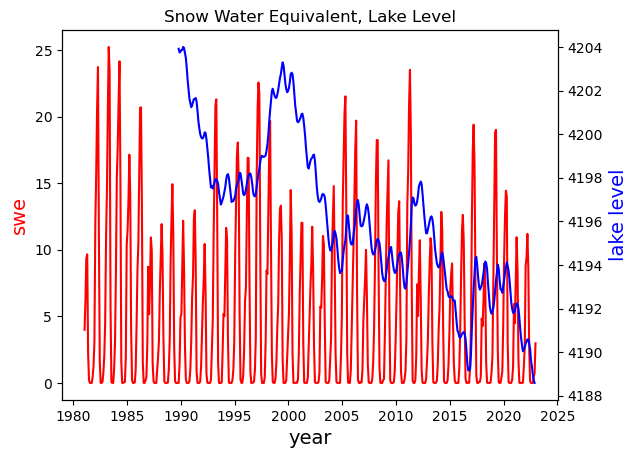

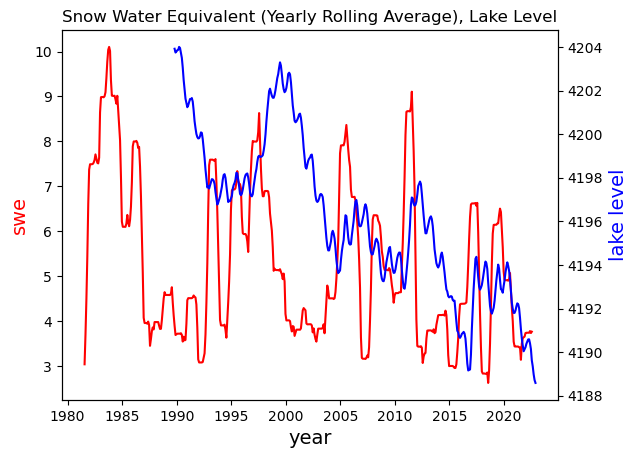

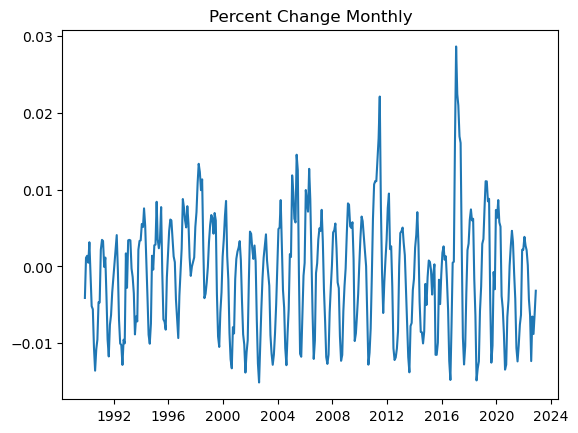

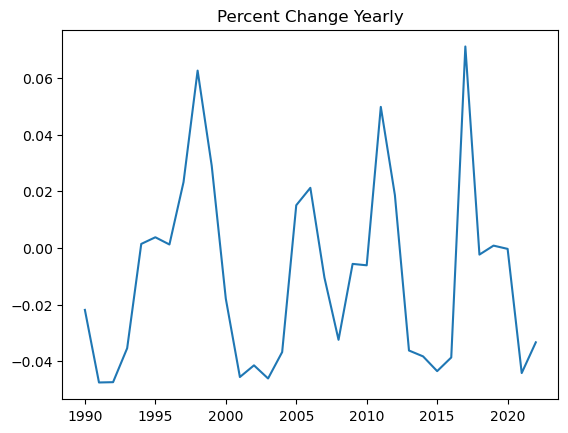

In [23]:
import matplotlib.pyplot as plt
swe = swe_df
lk_lvl = lk_lvl_df

combined = swe.merge(lk_lvl, on = 'date', how = 'outer')
combined_nan = combined[combined['lake_level'].isna()]
combined_even = combined.drop(combined_nan.index)

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(swe['date'],
        swe['swe'],
        color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("swe",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(lk_lvl['date'], lk_lvl['lake_level'],color="blue")
ax2.set_ylabel("lake level",color="blue",fontsize=14)
ax.set_title('Snow Water Equivalent, Lake Level')
plt.show()

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(swe['date'],
        swe['swe'].rolling(window = 12, center = True).mean(),
        color="red")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("swe",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(lk_lvl['date'], lk_lvl['lake_level'],color="blue")
ax2.set_ylabel("lake level",color="blue",fontsize=14)
ax.set_title('Snow Water Equivalent (Yearly Rolling Average), Lake Level')
plt.show()

# Figuring out of percent change can reveal any findings
pct_chng = lk_lvl['lake_level'].pct_change()*100 # % change between data points
plt.plot(lk_lvl['date'], pct_chng)
plt.title("Percent Change Monthly")
plt.show()

# Group by yearly average instead of monthly
lk_lvl["date"] = pd.to_datetime(lk_lvl["date"]) # idk why I need to do this but I do
yearly = lk_lvl.groupby(lk_lvl['date'].dt.year).agg('mean')
pct_chng_yr = yearly['lake_level'].pct_change()*100 # % change between data points
plt.plot(yearly.index, pct_chng_yr)
plt.title("Percent Change Yearly")
plt.show()

In [24]:
import statsmodels.formula.api as sm
prelim_reg = sm.ols('lake_level ~ swe', data = combined_even).fit()
prelim_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             lake_level   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.433
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.232
Time:                        10:30:57   Log-Likelihood:                -1068.3
No. Observations:                 398   AIC:                             2141.
Df Residuals:                     396   BIC:                             2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4196.0180      0.233    1.8e+04      0.000    4195.560    4196.476
swe            0.0361      0.030      1.197      0.232      -0.023       0.095
==============================================================================
Omnibus:                       15.881   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.973
Skew:                           0.241   Prob(JB):                      0.00683
Kurtosis:                       2.393   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on our preliminary findings, there is a statistically significant effect of snow-water equivalents on lake levels of the Great Salt Lake. However, based on our preliminary findings, using a single variable regression model, the effect shown was quite small. The coefficient for this effect was only .036. As it currently stands, the interpretation of this finding is not so clear. Base on the data, this means that for one inch of water created from melted snow, the lake would rise .036 feet. Because of the difficulty of interpretation, it is not yet clear if this effect is larger or smaller than we expected. 
<br>
<br>
Another observation that is important to note is that the R-squared value is extremely low. It is clear that there are other variables that have a significant effect on the lake levels that we are not including in our preliminary research. We will want to discuss what other variables to include in the research and if we think that having a much higher R-squared is necessary for this to continue to be valuable research. 
<br>
<br>
One important observation that comes from the visualizations are that there seems to be a decreasing trend in snow-water equivalents over the years but that it is quite small. This seems clear in both the yearly, running average visualization as well as the regular monthly average plots. This could be attributed to climate change and other environmental factors that lead to less snowfall and water run-off from year to year. However, the decrease in lake levels has decreased at a much greater rate. This leads us to believe that there are other things that are driving the lake levels down with much larger effects. We are excited to see what the introduction of water usage data on the model does. 
<br>
<br>
Percent change of the lake level yearly, and monthly, didn't reveal any trends that showed significance. For this reason, we won't utilize percent change data in our analysis moving forward. 

# Analysis Methodology

We applied OLS regression to find the effect of human and natural factors on the lake levels of the Great Salt Lake. To determine these effects, we applied the following model:  

- 𝑌 = (𝛽1 * 𝑋1) + (𝛽2 * 𝑋2) + 𝜀

Where Y represents the water elevation of the Great Salt Lake, X1 represents human factors and β1 is the effect of those factors on the water elevation. X2 represents natural factors, β2 is the effect of natural forces on the water elevation of the Great Salt Lake and epsilon represents the error term.  


β1 was estimated through an instrumental variable approach. This was done because there is no data available that measures total human water usage throughout the state. Instead, the data available only provides water usage per capita for culinary and household use. The available data does not include any secondary water that is used in agriculture, industry, or in many counties through Utah for domestic, outdoor use. Using this data, β1 would likely be biased because it would not capture the full effect of human forces on the water supplied to the Great Salt Lake. For this reason, we used an instrumental variable approach and used two variables to calculate β1.  The two variables that we used to calculate this were annual GDP and population numbers.  
 

The following directed acyclic graph (DAG) shows the reasoning for using these variables as instruments for human forces on the Great Salt Lake: 

- GDP/Population Growth ----> Human Water Usage ----> Great Salt Lake Water Elevation

We believe that GDP and population growth do influence the water elevation of the Great Salt Lake but only through its effect on human water usage. Population growth will be correlated to the water elevation level because as more people move into Utah or are born in the state, more people will be using water to live and to maintain their homes. This would not adequately represent all the human water usage, so we included GDP as well. We have reasoned that GDP influences lake levels but only through increased agricultural and industrial output that relies on water resources that would normally flow into the lake. We also believe that these variables capture the effect of humans on the climate in the state because population growth and industry are also commonly accepted causes of increased carbon emissions. We believe that these variables are not correlated directly to the water elevation levels.  

 

β2 was estimated more directly by gathering data on Utah precipitation and snow-water equivalent data.  These variables represent most of the effect of natural forces on the lake elevation. While it does not capture all the water usage by wildlife and other minor natural water uses, precipitation and weather will have the largest effect on the lake. Other variables will add to a negligible bias on β2. 

In [25]:
# Lake Level vs SWE Regression
reg1_sorted = final.sort_values(by='swe').reset_index(drop=True)
reg1 = sm.ols('lake_level ~ swe', data=reg1_sorted).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             lake_level   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.2886
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.595
Time:                        10:30:57   Log-Likelihood:                -84.407
No. Observations:                  32   AIC:                             172.8
Df Residuals:                      30   BIC:                             175.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4197.2118      1.862   2253.678      0.0

In [26]:
# Lake Level vs Precipitation Regression
reg2_sorted = final.sort_values(by='precipitation').reset_index(drop=True)
reg2 = sm.ols('lake_level ~ precipitation', data=reg2_sorted).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             lake_level   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1474
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.704
Time:                        10:30:57   Log-Likelihood:                -84.482
No. Observations:                  32   AIC:                             173.0
Df Residuals:                      30   BIC:                             175.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4197.3961      3.003   1397.556

In [27]:
# Lake Level vs Population Regression
reg3_sorted = final.sort_values(by='population').reset_index(drop=True)
reg3 = sm.ols('lake_level ~ population', data=reg3_sorted).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:             lake_level   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     78.86
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           5.04e-10
Time:                        10:30:57   Log-Likelihood:                -67.253
No. Observations:                  33   AIC:                             138.5
Df Residuals:                      31   BIC:                             141.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4211.3064      1.746   2412.396      0.0

In [28]:
# Lake Level VS GDP Regression 
reg4_sorted = final.sort_values(by='gdp').reset_index(drop=True)
reg4 = sm.ols('lake_level ~ gdp', data=reg4_sorted).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:             lake_level   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     43.70
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           7.74e-07
Time:                        10:30:57   Log-Likelihood:                -54.127
No. Observations:                  26   AIC:                             112.3
Df Residuals:                      24   BIC:                             114.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4201.6993      1.054   3987.068      0.0

# Data Visualization

We chose Bokeh as the data visualization module to display the data analysis for this project. It is a highly interactive data visualization library that allows for a variety of graphing options. It exports the dashboard as an html file - a webpage - when you run the script. Bokeh allows you to pan across the graph and zoom in or out on the data. Plots of time series data are generated as line graphs. The regression summaries are generated as scatter plots with the line of best fit superimposed on the scattered data. 

In [29]:
 # import a bunch of stuff from bokeh
from bokeh.io import output_file, show, curdoc
from bokeh.layouts import gridplot, column, row
from bokeh.plotting import figure, output_file, show
from bokeh.transform import factor_cmap
from bokeh.models.widgets import Tabs, Panel
from bokeh.models import ColumnDataSource, RangeTool, Div, text
from bokeh.sampledata.autompg import autompg_clean as df

curdoc().theme = "light_minimal"
output_file("gfg.html")

### Lake Level VS Time
fig1 = figure(title="Lake Level", plot_width=1200, plot_height=300, x_axis_type="datetime")
fig1.line(np.array(lk_lvl_annual['date']), lk_lvl_annual['lake_level'], 
          line_color='blue', line_width=3)
fig1.yaxis.axis_label = 'Lake Level [elevation]'


### Lake Level VS SWE
# plotting the line graph SWE (purple)
fig2 = figure(title="Snow Water Equivalent", plot_width=1200, plot_height=300, x_axis_type="datetime")
fig2.line(np.array(swe_annual['date'], dtype=np.datetime64), swe_annual.swe, 
          line_color='purple', line_width=3)
fig2.yaxis.axis_label = 'Snow Water Equivalent [in]'

# Lake Level vs SWE Regression
fig3 = figure(title="Lake Level VS Snow Water Equivalent", plot_width=1200, plot_height=300)
fig3.scatter(x=final['swe'],y=final['lake_level'],fill_color='k')
fig3.line(reg1_sorted['swe'], reg1.predict(), line_color='purple', line_width=3)
fig3.yaxis.axis_label = 'Snow Water Equivalent [in]'
fig3.xaxis.axis_label = 'Lake Level [ft]'
  

### Lake Level VS Precipitation
# plotting precipitation (brown)
fig4 = figure(title="Precipitation", plot_width=1200, plot_height=300, x_axis_type="datetime")
fig4.line(np.array(precip_annual['date']), precip_annual['precipitation'], 
          line_color='brown', line_width=3)
fig4.yaxis.axis_label = 'Precipitation [inches]'

# Lake Level vs Precipitation Regression
fig5 = figure(title="Lake Level VS Precipitation", plot_width=1200, plot_height=300)
fig5.scatter(x=final['precipitation'],y=final['lake_level'],fill_color='k',marker='*')
fig5.line(reg2_sorted['precipitation'], reg2.predict(), line_color='brown', line_width=3)
fig5.yaxis.axis_label = 'Lake Level [ft]'
fig5.xaxis.axis_label = 'Precipitation [in]'


### Lake Level vs Population 
# plotting population (red)
fig6 = figure(title="Population", plot_width=1200, plot_height=300, x_axis_type="datetime")
fig6.line(np.array(pop_annual['date']), pop_annual['population'], 
          line_color='red', line_width=3)
fig6.yaxis.axis_label = 'Population of Utah [people]'

# Lake Level vs Population Regression
fig7 = figure(title="Lake Level VS Population", plot_width=1200, plot_height=300)
fig7.scatter(x=final['population'],y=final['lake_level'],fill_color='k',marker='*')
fig7.line(reg3_sorted['population'], reg3.predict(), line_color='red', line_width=3)
fig7.yaxis.axis_label = 'Lake Level [ft]'
fig7.xaxis.axis_label = 'Population'


### Lake Level vs GDP 
# plotting GDP (green)
fig8 = figure(title="Gross Domestic Product [GDP]", plot_width=1200, plot_height=300, x_axis_type="datetime")
fig8.line(np.array(gdp_annual['date']), gdp_annual['gdp'], 
          line_color='green', line_width=3)
fig8.yaxis.axis_label = 'Dollars [USD]'

# Lake Level VS GDP Regression 
fig9 = figure(title="Lake Level VS GDP", plot_width=1200, plot_height=300)
fig9.scatter(x=final['gdp'],y=final['lake_level'],fill_color='black',marker='*')
fig9.line(reg4_sorted['gdp'], reg4.predict(), line_color='green', line_width=3)
fig9.yaxis.axis_label = 'Lake Level [ft]'
fig9.xaxis.axis_label = 'GDP'

# displaying the model
show(column(fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9))


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "k" [renderer: GlyphRenderer(id='4422', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "k" [renderer: GlyphRenderer(id='4506', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "k" [renderer: GlyphRenderer(id='4338', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "k" [renderer: GlyphRenderer(id='4422', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "k" [renderer: GlyphRenderer(id='4506', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "k" [renderer: GlyphRenderer(id='4338', ...)]


# Results

Our results showed that the variables that we chose explain much the variation in the lake level through a high R2 value of 0.77. Three of our variables had statistically significant effects on the elevation of the lake: snow water equivalent, GDP, population.  

 

Snow water equivalent was a surprising result that needs to be investigated more closely and additional recommendations for further research will be provided in the next section. Our regression shows that snow water equivalent has a negative effect on the level of the Great Salt Lake, for every inch of snow water equivalent, the lake decreases in elevation by a number between 0.03-0.04 feet. One possible explanation is that humans might use more water in a wet year than is available. However, this effect should have been captured in the population variable that was included in the regression.  

 

The effect of population on the water elevation was also statistically significant. The regression shows that for an increase of every 100,000 people in the state of Utah that the lake level would decrease by .75 feet. Because GDP and population are so closely correlated and the chance for multicollinearity is very high when including them both in the regression. Thus, we did not include both of these variables in one model. The regression with GDP is also significant and showed that for every increase in $100,000 in GDP that the lake level will drop by 5.85 feet.  

 

Precipitation did not show a statistically significant effect on the lake levels. This could be because of a high correlation between precipitation and snow water equivalent, which were both included in the regression analysis. Much of the effect of precipitation would be captured by the effect of the snow water equivalent that has a different and more important effect on lake levels.  

 

Based on these results, we feel that we have been able to answer the questions that we originally set out to learn more about. Rainfall and snowfall have different effects on the water levels of the Great Salt Lake and human factors have a much more important impact on the water levels.  

 

Some of the potential problems with our methodology will be discussed below.

# Evaluation

While the effects were significant, the methodology could be improved upon. It is difficult to rationalize how the snow water equivalent can have a statistically significant, negative relationship to the lake level. One of the possible factors that was overlooked could be average temperatures in the area. While the GDP and population variables are likely to capture some of this effect, the full effect of temperatures are likely introducing bias to the snow water equivalent variable. This effect may have a negative effect that is greater than the positive effect of the snowpack and biases the result negatively. In further research, it would be useful to include the average yearly temperatures as well. 

 

Another potential problem with the methodology is that the sample size was not large. Originally, we had hoped that we could use monthly data and that we would have many more years of available data. However, the data that was available for some of the variables was limited to annual averages and did not have a long history of data collection. With more time, it would be helpful to find estimated data for each of the variables that we used over a much larger timeframe.  

 

One final issue that should be considered is the scale of the data that was collected. The effect sizes of the snow water equivalent and the precipitation likely have inaccuracies because of the data that we were able to gather. The snow water equivalent data covered the entire state of Utah and may have a smaller effect because not all of that snow has an effect on the water elevation of the Great Salt Lake. Additionally, the precipitation data that we collected was only for Salt Lake County. While this covers a large portion of the water that feeds into the Great Salt Lake, there are other counties that are also important for the water levels. For this reason, the precipitation effect that we captured is likely smaller than the real effect.  

# Ethical Considerations

We want to make sure that the data that we use will not cause harm to any stakeholders. The primary stakeholders related to this research are: Utah residents, the Utah government and policymakers, and Utah agriculture and watershed-reliant businesses. To prevent causing any harm to any individual stakeholder, we have decided to use water usage data on a state level so as not to unintentionally put blame on any types of water users. Previous research has left certain stakeholders feeling as if they are receiving a disproportionate amount of the blame and are under increasing pressure to decrease water use as a result of that research. We want to avoid this, so our data will not breakdown any type of water user to protect those stakeholders from experiencing something similar. 


# Project Summary

What is an overview of your project? 
- This project evaluated different factors on the water level of the Great Salt Lake (GSL). Do precipitation and snowfall have different effects on water levels of the GSL. Does precipitation or human factors have more of an impact on water levels of the GSL? 

 
What are your project objectives? 
- Our objectives were to determine the answers to the questions above. 

 
What are your technical contributions? 
- Our technical contributions included cleaning the data, running regressions, and making a dashboard. 

 
What are the main results? 
- The results are evaluated based on the econometric methodology applied. 

 
How are the results evaluated? 
- The main results show that human effects have a greater impact on the elevation of the Great Salt Lake than precipitation effects and that snowfall has a greater impact than precipitation. 

 
What are the future directions? 
- In the future, it would be important to include temperature data, consolidate the snow water equivalent data, and use a broader range of precipitation data. It would also be helpful to have estimates of lake each of our variables that go back further in time to have a larger sample size. 